In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# 1. Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training images:", train_images.shape)
print("Training labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


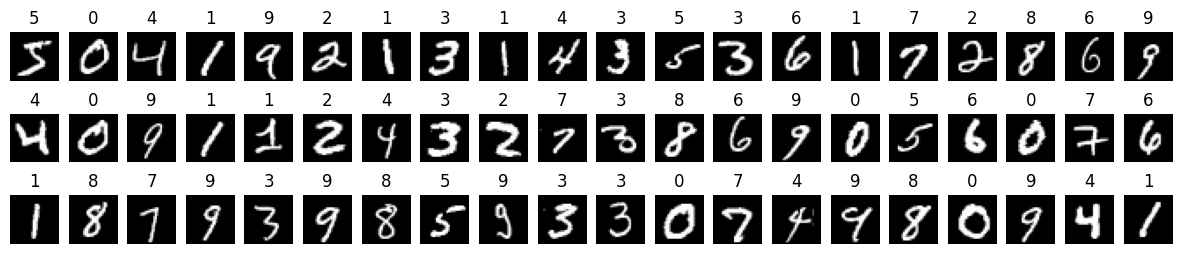

In [31]:
# 2. Normalize and reshape
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# CNN expects (28,28,1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# 3. Show a few examples
plt.figure(figsize=(15, 3))
for i in range(60):
    plt.subplot(3, 20, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(train_labels[i])
    plt.axis("off")
plt.show()


In [32]:
# 4. Build CNN model
cnn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

cnn_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 5. Train the model
history = cnn_model.fit(train_images, train_labels,
                        epochs=5, batch_size=64,
                        validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9524 - loss: 0.1573 - val_accuracy: 0.9844 - val_loss: 0.0481
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9845 - loss: 0.0501 - val_accuracy: 0.9883 - val_loss: 0.0338
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9887 - val_loss: 0.0349
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9913 - loss: 0.0260 - val_accuracy: 0.9910 - val_loss: 0.0269
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9910 - val_loss: 0.0252


In [34]:
# 6. Evaluate
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=0)
print(f"Final test accuracy: {test_acc:.4f}")

Final test accuracy: 0.9910


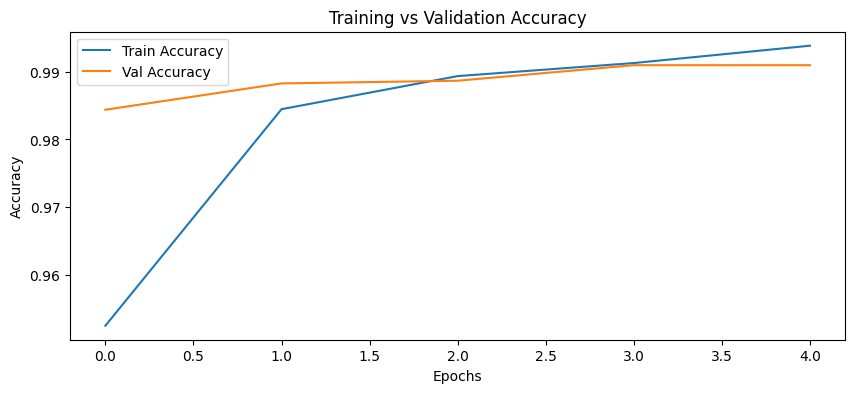

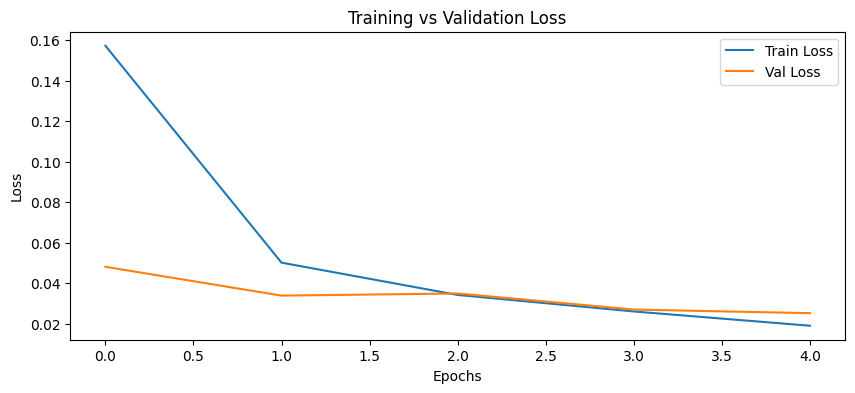

In [35]:
# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [36]:
cnn_model.save("mnist_model.h5")
print("Model saved as mnist_model.h5")

Model saved as mnist_model.h5
